In [12]:
import time
import scipy.integrate as integrate
import matplotlib.animation as animation
# %matplotlib inline
%matplotlib notebook

plt.ion()

In [3]:
ve = 10.  # initial velocity of incoming electron
re = -1000 

tf = (10 - re) /  ve
t = np.linspace(0, tf, 1000)

ke = .01
k = .1
d = 1.
yp, ym = d/2., -d/2.

# vector of initial conditions is (re, 0, yp, ym, ve, 0, 0, 0, 0, 0, 0, 0)
po = [re, 0, yp*1.1, ym*1.1, ve, 0, 0, 0, 0, 0, 0, 0]

# vector of functions is (xe, ye, yu, yd, vxe, vye, vyu, vyd, axe, aye, ayu, ayd)

def Fc(x1, y1, x2, y2):
    r = np.sqrt((x1-x1)**2 + (y1-y2)**2)
    return ke / r**2

def f(p, t):
    '''Returns derivative of vector (xe, ye, yu, yd, vxe, vye, vyu, vyd, axe, aye, ayu, ayd)
    '''
    xe, ye, yu, yd, vxe, vye, vyu, vyd, axe, aye, ayu, ayd = p
    
    def Sphi(z):
        return np.sin(np.arctan( (z-ye)/xe ))
    
    def Cphi(z):
        return np.cos(np.arctan( (z-ye)/xe ))
        
    daxedt = - Fc(xe, ye, 0, yu)*Sphi(yu) - Fc(xe, ye, 0, yd)*Sphi(yd)
    dayedt = - Fc(xe, ye, 0, yu)*Cphi(yu) + Fc(xe, ye, 0, yd)*Cphi(yd)
    
    dayudt = -k*(yu - yp) + Fc(xe, ye, 0, yu)*Sphi(yu)
    dayddt = -k*(yd - ym) + Fc(xe, ye, 0, yd)*Sphi(yd)
    
    dpdt = [vxe, vye, vyu, vyd, axe, aye, ayu, ayd, daxedt, dayedt, dayudt, dayddt]

    return dpdt


In [4]:
sol = integrate.odeint(f, po, t, full_output=1)

/home/morejonl/afs_work-lm/anaconda2/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


## Representing solution in animation

<IPython.core.display.Javascript object>


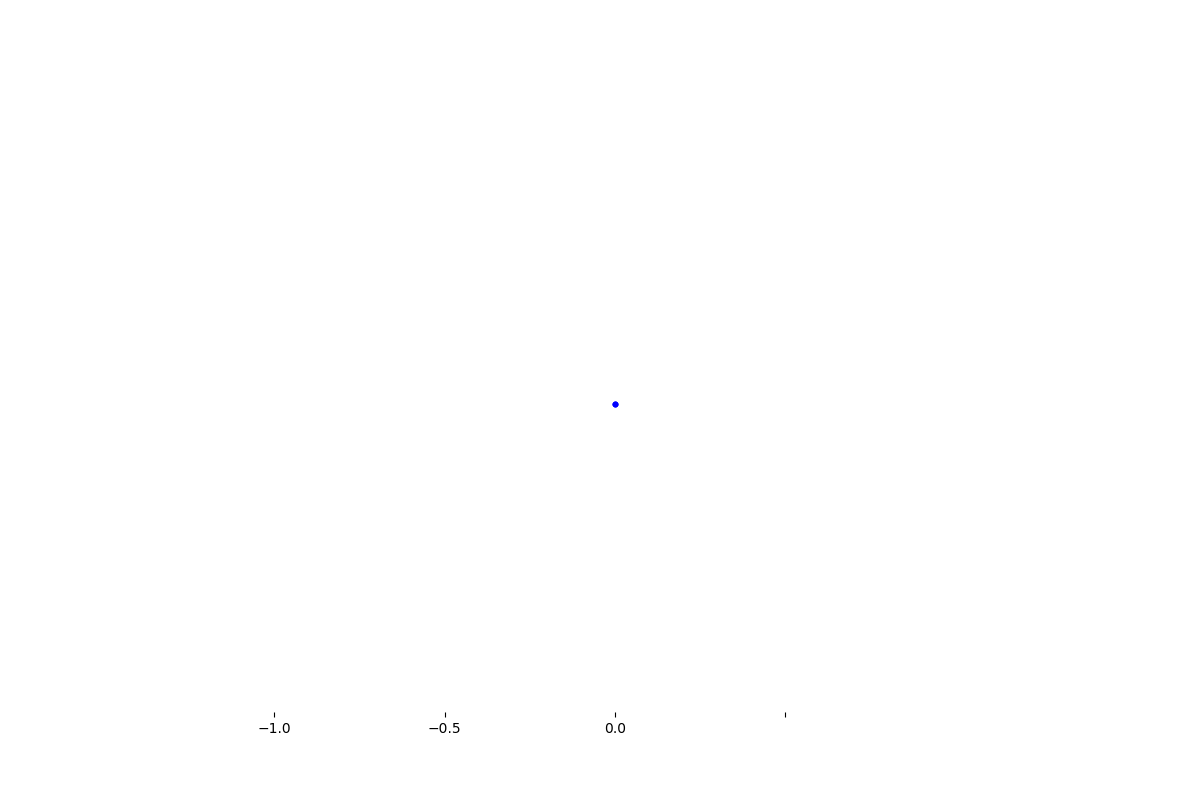

KeyboardInterrupt: 

In [19]:
fig1, ax = plt.subplots(1,1, figsize=(12, 8))
plt.ion()

fig1.show()
fig1.canvas.draw()

ims = []

for s in range(1000):
    ax.clear()
    x = sol[0][s, 0], 0, 0
    y = sol[0][s, 1:4]
#     ims.append((plt.scatter(x, y, color='b', s=10), ))
    plt.scatter(x, y, color='b', s=10)
    ax.set_ylim((d, -d))
    fig1.canvas.draw()
#     time.sleep(.001)

<IPython.core.display.Javascript object>


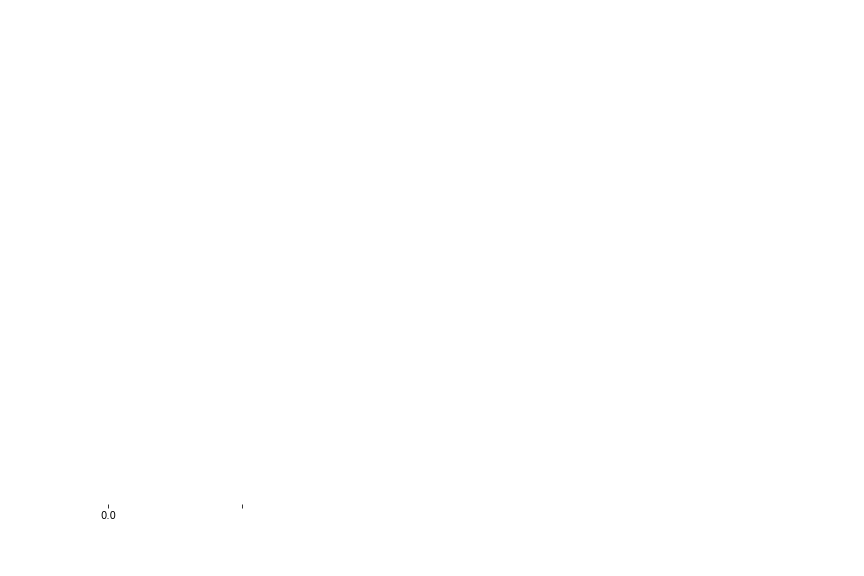

In [25]:
fig1, ax = plt.subplots(1,1, figsize=(12, 8))
ax.set_ylim((d, -d))

im_ani = animation.ArtistAnimation(fig1, ims, interval=1, repeat_delay=3000)